# Temperature Derivates

Temperature data is free and available from many meteorological stations across the world. The information is given in the following form:

- High - max temperature of the day: $T_{n}^{max}$
- Min temperature of the day: $T_{n}^{min}$
- Avg temperature of the day: $T_{n}$


Although this definition is not exactly the intuitive notation of what average temperatures are for a given day,this is the standard definition that is used for definind heating degree days (HDD) and cooling degree days (CDD).

On each day (period) $n \in N:$
- the heating degree days is defined as **$HDD_{n} = (65 - T_{n}^{max})$**
- the cooling degree days is defined as **$CDD_{n} = (T_{n}^{min} - 65)$**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
temps = np.random.normal(65, 5, 92)
HDD_p = np.maximum(0, 65-temps)
CDD_p = np.maximum(0, temps-65)

df = pd.DataFrame(np.array([temps, HDD_p, CDD_p]).T, index=range(1,len(temps)+1),
                    columns=['Avg_Temperature', 'HDD','CDD'])
df.loc['Total'] = pd.Series(df[['HDD', 'CDD']].sum()) 

In [3]:
df

,Avg_Temperature,HDD,CDD
1,64.219232,0.780768,0.000000
2,62.913407,2.086593,0.000000
3,51.056968,13.943032,0.000000
4,64.666117,0.333883,0.000000
5,70.611313,0.000000,5.611313
...,...,...,...
89,55.896911,9.103089,0.000000
90,72.831596,0.000000,7.831596
91,64.096428,0.903572,0.000000
92,60.096731,4.903269,0.000000


## Traded Products

Futures contracts on monthly cumulative degree days have been introduced by the [CME](https://www.cmegroup.com/).


But the traded volumnes are small. So we will be considering contracts that trade in the OTC market. We standarise our notation to refer to other reference temperatures instead of only 65 degrees fahrenheit.

For a day $n \in N:$
- $HDD_{n} = (T_{ref}-T_{n})^{+}$
- $CDD_{n} = (T_{n}-T_{ref})^{+}$

Here the buyer of an option will receive an amount:

$\xi = f(DD)$ payoff function f is computed on the cumulative index over a period P:
- heating degree seasons $DD = H_{n} = HDD^{N} = \sum_{n}^{N} HDD_{n}$
- cooling degree seasons $DD = C_{n} = CDD^{N} = \sum_{n}^{N} CDD_{n}$

**Typical Seasons OTC**

- CDD season: 15-May to 15-Sep
- HDD season: 15-Dec(Nov) to 15-Mar

In [4]:
alpha = 5000
beta = 5000
Kc = 750
Kp = 550
C=5e5
F=1e6

DD = np.arange(200, 1000, 10)
call = np.minimum(alpha*np.maximum(DD-Kc, 0),C)
put = np.minimum(alpha*np.maximum(Kp-DD, 0),F)
collar = call - put

## Popular Payoff Functions

### Call with Cap

$\xi = min{\alpha(DD-K)^{+},C}$

where: 
- payoff rates $\alpha$ is commonly US$2,500 or US$5,000
- while caps C is commonly US$500,000 or US$1,000,000


Example: cruices suffer reduced summer sales when there are extremely hot spring weather, to hedge risk the company buys an out of the money call on Spring CDD's, possibly with a cap because the business will sell a minimum number of cruises no matter what.

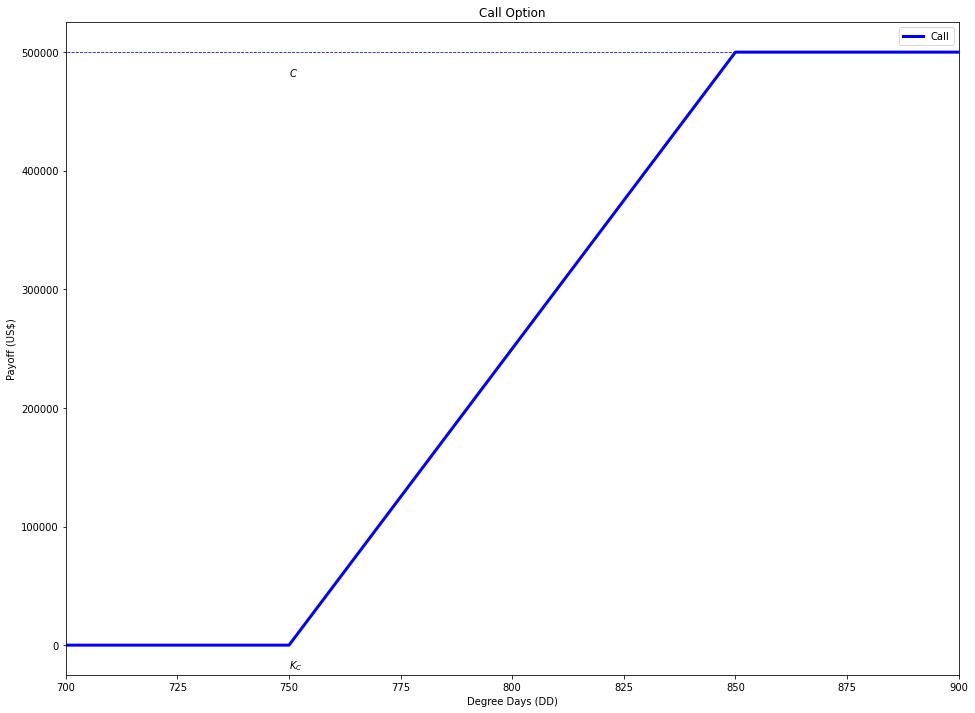

In [5]:
fig = plt.figure(figsize=(16,12))
plt.plot(DD, call, 'b', linewidth=3, label='Call')
plt.plot([200, 1000], [C,C], 'b--', linewidth=0.8)

plt.text(750, C-.2e5, r'$C$')
plt.text(Kc, -.2e5, r'$K_C$')
plt.xlim([700, 900])

plt.title('Call Option')
plt.xlabel('Degree Days (DD)')
plt.ylabel('Payoff (US$)')
plt.legend()
plt.show()

### Put with a Floor

$\xi = min{\alpha(K-DD)^{+},F}$

Example: To hedge risk that a warm winter decreases sales revenue from a gas company, they may choose to buy a put on HDD's over the winter season

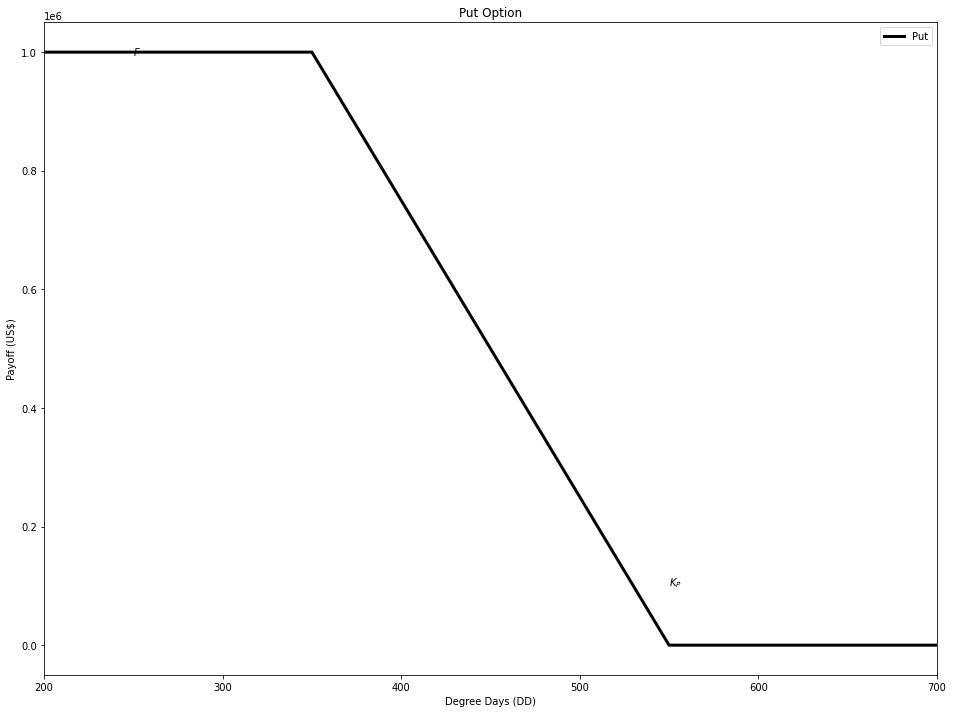

In [6]:
fig = plt.figure(figsize=(16,12))
plt.plot(DD, put, 'k', linewidth=3, label='Put')

plt.text(250, F-.5e4, r'$F$')
plt.text(Kp, +.1e6, r'$K_P$')
plt.xlim([200, 700])

plt.title('Put Option')
plt.xlabel('Degree Days (DD)')
plt.ylabel('Payoff (US$)')
plt.legend()
plt.show()

### Collar - Long call and short Put or vice versa

$\xi = min{\alpha(DD-K_{1}^{+},C) - min{\beta(K_{2}-DD)^{+},F}}$

Example: to hedge revenues against a mild winter, a gas company could enter into a zero dollar collar contract (no up-front cost) that pays the writer if the winter is cold and receives payment if the winter is warm

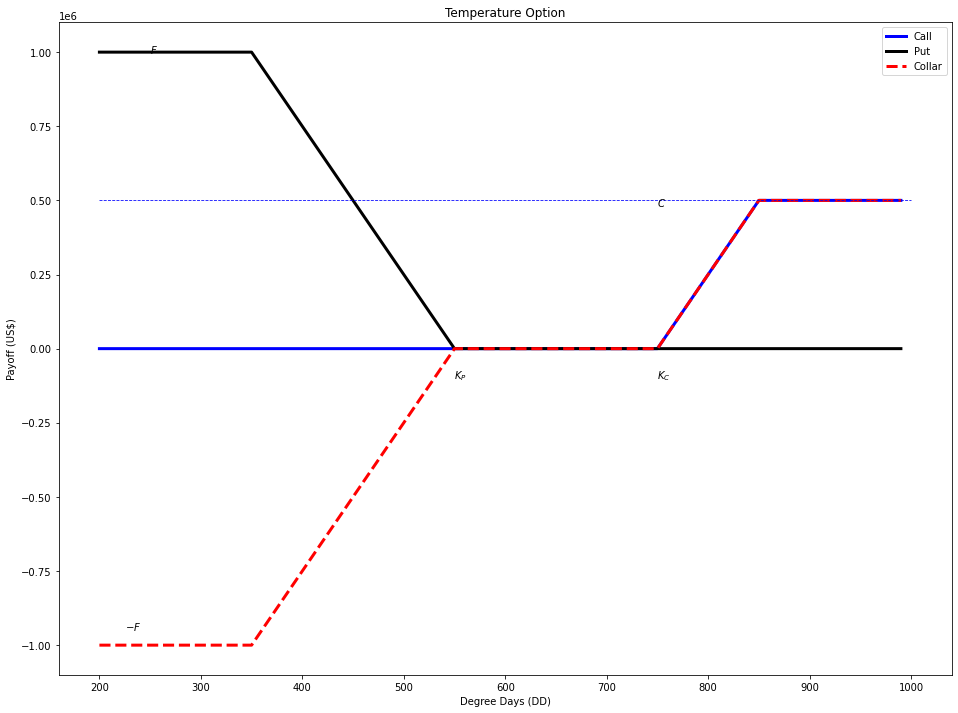

In [7]:
fig = plt.figure(figsize=(16,12))
plt.plot(DD, call, 'b', linewidth=3, label='Call')
plt.plot(DD, put, 'k', linewidth=3, label='Put')
plt.plot(DD, collar, 'r--', linewidth=3, label='Collar')
plt.plot([200, 1000], [C,C], 'b--', linewidth=0.8)

plt.text(750, C-.2e5, r'$C$')
plt.text(250, F-.5e4, r'$F$')
plt.text(225, -F+.5e5, r'$-F$')

plt.text(Kc, -.1e6, r'$K_C$')
plt.text(Kp, -.1e6, r'$K_P$')

plt.title('Temperature Option')
plt.xlabel('Degree Days (DD)')
plt.ylabel('Payoff (US$)')
plt.legend()
plt.show()

# Statistical Analysis of Temperature Data

In [8]:
import glob

df_list_max = []
df_list_min = []
list_of_files = glob.glob('./Data/*.csv')
for file in list_of_files:
    temp = pd.read_csv(file)
    if file.find("IDCJAC0010") != -1:
        temp = temp.iloc[290:] if file.find("66214") != -1 else temp.iloc[:57999]
        df_list_max.append(temp)
    else:
        temp = temp.iloc[291:] if file.find("66214") != -1 else temp.iloc[:58000]
        df_list_min.append(temp)

In [9]:
df_max = pd.concat(df_list_max)
df_max

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality
290,IDCJAC0010,66214,2017,10,18,25.0,1.0,Y
291,IDCJAC0010,66214,2017,10,19,27.1,1.0,Y
292,IDCJAC0010,66214,2017,10,20,19.5,1.0,Y
293,IDCJAC0010,66214,2017,10,21,19.6,1.0,Y
294,IDCJAC0010,66214,2017,10,22,23.3,1.0,Y
...,...,...,...,...,...,...,...,...
57994,IDCJAC0010,66062,2017,10,13,23.2,1.0,Y
57995,IDCJAC0010,66062,2017,10,14,22.3,1.0,Y
57996,IDCJAC0010,66062,2017,10,15,22.4,1.0,Y
57997,IDCJAC0010,66062,2017,10,16,23.3,1.0,Y


In [10]:
df_min = pd.concat(df_list_min)
df_min

,Product code,Bureau of Meteorology station number,Year,Month,Day,Minimum temperature (Degree C),Days of accumulation of minimum temperature,Quality
291,IDCJAC0011,66214,2017,10,19,16.6,1.0,Y
292,IDCJAC0011,66214,2017,10,20,18.7,1.0,Y
293,IDCJAC0011,66214,2017,10,21,12.7,1.0,Y
294,IDCJAC0011,66214,2017,10,22,13.2,1.0,Y
295,IDCJAC0011,66214,2017,10,23,12.3,1.0,Y
...,...,...,...,...,...,...,...,...
57995,IDCJAC0011,66062,2017,10,14,17.1,1.0,Y
57996,IDCJAC0011,66062,2017,10,15,16.0,1.0,Y
57997,IDCJAC0011,66062,2017,10,16,15.9,1.0,Y
57998,IDCJAC0011,66062,2017,10,17,16.9,1.0,Y


## Check for missing data

In [11]:
df_min.isna().sum(), df_max.isna().sum()

(Product code                                     0
 Bureau of Meteorology station number             0
 Year                                             0
 Month                                            0
 Day                                              0
 Minimum temperature (Degree C)                 155
 Days of accumulation of minimum temperature    288
 Quality                                        155
 dtype: int64,
 Product code                                     0
 Bureau of Meteorology station number             0
 Year                                             0
 Month                                            0
 Day                                              0
 Maximum temperature (Degree C)                 156
 Days of accumulation of maximum temperature    289
 Quality                                        158
 dtype: int64)

In [12]:
count = 0
for mx, mn in zip(np.where(df_max.isnull())[0], np.where(df_min.isnull())[0]):
    if mx != mn:
        count += 1
        
print(f'Number of misaligned Null Values: {count}')

Number of misaligned Null Values: 320


## Create cleaned max min temperature dataframe

In [13]:
from datetime import datetime
def traf_datetime(row):
    return datetime(row.Year,row.Month,row.Day)

In [14]:
df_max['Date'] = df_max.apply(traf_datetime,axis=1)
df_min['Date'] = df_min.apply(traf_datetime,axis=1)

df_max.set_index('Date', inplace=True)
df_min.set_index('Date', inplace=True)

drop_cols = [0,1,2,3,4,6,7]

df_max.drop(df_max.columns[drop_cols],axis=1,inplace=True)
df_min.drop(df_min.columns[drop_cols],axis=1,inplace=True)

df_max.rename(columns={'Maximum temperature (Degree C)':'Tmax'}, inplace=True)
df_min.rename(columns={'Minimum temperature (Degree C)':'Tmin'}, inplace=True)

In [15]:
df = pd.merge(df_max, df_min, how='inner', on=['Date'])

def avg_temp(row):
    return (row.Tmax + row.Tmin)/2

df['T'] = df.apply(avg_temp, axis=1)

df = df.dropna()

del df_min, df_max

In [16]:
df

,Tmax,Tmin,T
Date,,,
2017-10-18,25.0,18.8,21.90
2017-10-19,27.1,16.6,21.85
2017-10-20,19.5,18.7,19.10
2017-10-21,19.6,12.7,16.15
2017-10-22,23.3,13.2,18.25
...,...,...,...
2017-10-13,23.2,14.7,18.95
2017-10-14,22.3,17.1,19.70
2017-10-15,22.4,16.0,19.20


In [17]:
df.sort_index(inplace=True)
df

,Tmax,Tmin,T
Date,,,
1859-01-01,24.4,14.5,19.45
1859-01-02,24.4,15.7,20.05
1859-01-03,24.2,15.3,19.75
1859-01-04,24.7,17.4,21.05
1859-01-05,24.6,16.9,20.75
...,...,...,...
2022-08-02,21.2,7.9,14.55
2022-08-03,24.7,11.9,18.30
2022-08-04,21.3,15.4,18.35


In [18]:
df.describe()

,Tmax,Tmin,T
count,59588.000000,59588.000000,59588.000000
mean,21.769168,13.814938,17.792053
std,4.676159,4.439047,4.296018
min,7.700000,2.100000,6.400000
25%,18.300000,10.100000,14.200000
50%,21.700000,14.000000,17.900000
75%,24.900000,17.500000,21.100000
max,45.800000,27.600000,33.750000


## Indicate winter and summer periods

In Australia:
- Winter -> May-Oct
- Summer -> Nov-Apr

In [19]:
df['month'] = df.index.month
mask = (df['month'] >= 5) & (df['month']<=10)

df['winter'] = np.where(mask, 1,0)
df['summer'] = np.where(df['winter']!=1, 1,0)
df

,Tmax,Tmin,T,month,winter,summer
Date,,,,,,
1859-01-01,24.4,14.5,19.45,1,0,1
1859-01-02,24.4,15.7,20.05,1,0,1
1859-01-03,24.2,15.3,19.75,1,0,1
1859-01-04,24.7,17.4,21.05,1,0,1
1859-01-05,24.6,16.9,20.75,1,0,1
...,...,...,...,...,...,...
2022-08-02,21.2,7.9,14.55,8,1,0
2022-08-03,24.7,11.9,18.30,8,1,0
2022-08-04,21.3,15.4,18.35,8,1,0


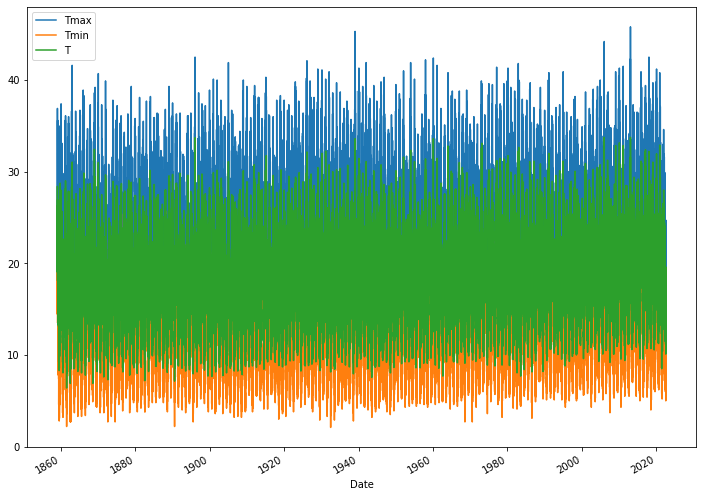

In [20]:
df[['Tmax','Tmin','T']].plot(figsize=(12,9))
plt.show()

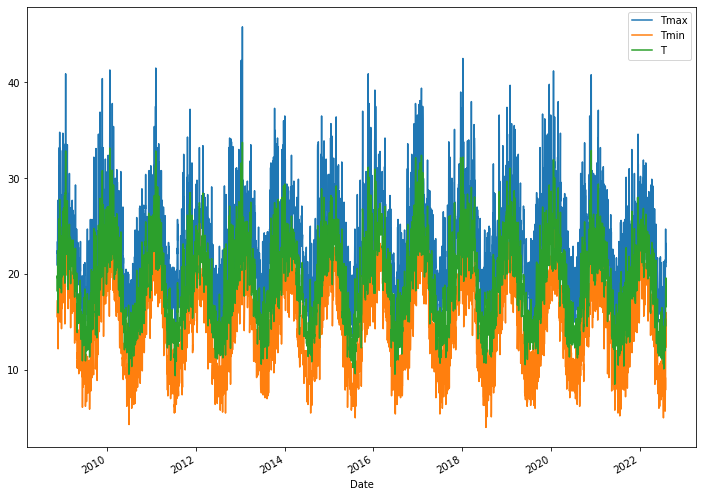

In [21]:
df.iloc[-5000:,0:3].plot(figsize=(12,9))
plt.show()

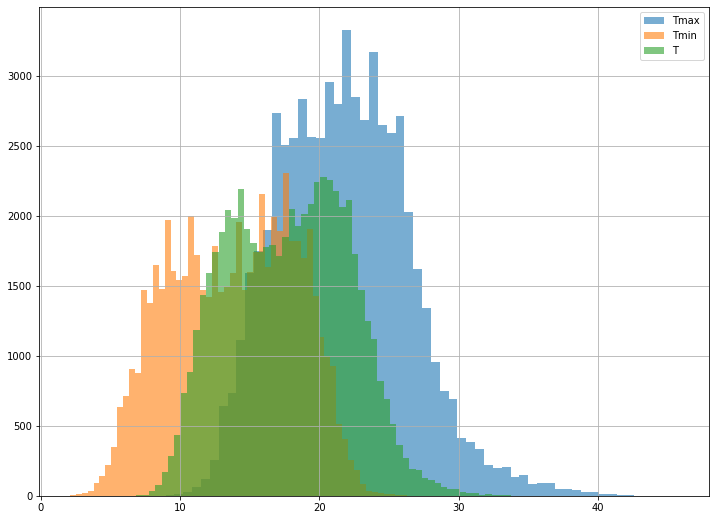

In [22]:
plt.figure(figsize=(12,9))

df.Tmax.hist(bins=60, alpha=0.6,label='Tmax')
df.Tmin.hist(bins=60, alpha=0.6,label='Tmin')
df['T'].hist(bins=60, alpha=0.6,label='T')
plt.legend()
plt.show()

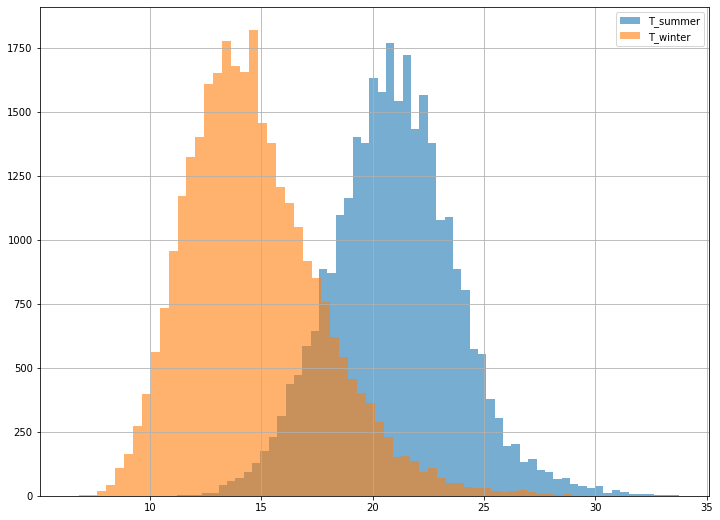

In [23]:
plt.figure(figsize=(12,9))

df[df['summer']==1]['T'].hist(bins=60, alpha=0.6,label='T_summer')
df[df['winter']==1]['T'].hist(bins=60, alpha=0.6,label='T_winter')

plt.legend()
plt.show()

## Temperatures Records

List of min and max records for each month

In [24]:
date_list = df.index.to_list()
month_df = pd.DataFrame(data=date_list, index=date_list).resample('MS')[0].agg(['min','max'])
month_df['month'] = month_df.index.month

def min_max_temperatures(row):
    stats = df[(df.index >= row['min'])&(df.index <= row['max'])].agg([min, max])
    row['Tmax_max'] = stats.loc['max', 'Tmax']
    row['Tmax_min'] = stats.loc['min', 'Tmax']
    row['Tmin_max'] = stats.loc['max', 'Tmin']
    row['Tmin_min'] = stats.loc['min', 'Tmin']
    row['T_avg_max'] = stats.loc['max', 'T']
    row['T_avg_min'] = stats.loc['min', 'T']
    return row

month_df = month_df.apply(min_max_temperatures, axis=1)
month_df

,min,max,month,Tmax_max,Tmax_min,Tmin_max,Tmin_min,T_avg_max,T_avg_min
1859-01-01,1859-01-01,1859-01-31,1,36.9,20.6,19.9,14.5,28.40,18.10
1859-02-01,1859-02-01,1859-02-28,2,35.6,19.9,20.0,13.3,26.95,17.25
1859-03-01,1859-03-01,1859-03-31,3,30.4,18.8,18.9,13.3,23.55,17.10
1859-04-01,1859-04-01,1859-04-30,4,31.1,16.8,17.7,7.8,22.45,13.25
1859-05-01,1859-05-01,1859-05-31,5,28.6,13.9,16.7,4.6,22.65,9.25
...,...,...,...,...,...,...,...,...,...
2022-04-01,2022-04-01,2022-04-30,4,29.9,18.2,17.9,13.1,23.30,15.90
2022-05-01,2022-05-01,2022-05-31,5,26.8,14.9,18.2,8.2,21.45,12.05
2022-06-01,2022-06-01,2022-06-30,6,21.8,15.0,10.9,6.0,16.05,11.30
2022-07-01,2022-07-01,2022-07-31,7,21.3,12.0,14.4,5.0,16.50,10.10


In [25]:
month_df.index = month_df.index.to_period('M')
month_df.drop(['min','max'], axis=1, inplace=True)
month_df

,month,Tmax_max,Tmax_min,Tmin_max,Tmin_min,T_avg_max,T_avg_min
1859-01,1,36.9,20.6,19.9,14.5,28.40,18.10
1859-02,2,35.6,19.9,20.0,13.3,26.95,17.25
1859-03,3,30.4,18.8,18.9,13.3,23.55,17.10
1859-04,4,31.1,16.8,17.7,7.8,22.45,13.25
1859-05,5,28.6,13.9,16.7,4.6,22.65,9.25
...,...,...,...,...,...,...,...
2022-04,4,29.9,18.2,17.9,13.1,23.30,15.90
2022-05,5,26.8,14.9,18.2,8.2,21.45,12.05
2022-06,6,21.8,15.0,10.9,6.0,16.05,11.30
2022-07,7,21.3,12.0,14.4,5.0,16.50,10.10


## Explore Temperatures Extremes

In [26]:
group_month = month_df.groupby(month_df.month)[['Tmax_max','Tmax_min','Tmin_max',
                                                'Tmin_min']].agg([min,max])

group_month['months'] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
group_month = group_month.set_index('months')
group_month[[('Tmax_max', 'max'),('Tmin_min', 'min'),('Tmax_min', 'min'),('Tmin_max', 'max')]]

,Tmax_max,Tmin_min,Tmax_min,Tmin_max
,max,min,min,max
months,,,,
Jan,45.8,10.6,17.2,26.2
Feb,42.1,9.6,15.6,27.6
Mar,39.8,9.3,16.2,25.4
Apr,35.6,7.0,13.8,24.3
May,30.0,4.4,11.3,20.8
Jun,26.9,2.1,9.7,18.4
Jul,26.5,2.2,7.7,18.1
Aug,31.3,2.7,9.1,19.7


## Decompose Time Series Components

Statsmodels use classical decomposition. 

  *A down side of using classical is that when the final subsequence is less than the periodicity, it will extrapolate, were we can see in the case of 10 years*

In [27]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order, AutoRegResults

<AxesSubplot:title={'center':'Rolling mean over anual period'}, xlabel='Date'>

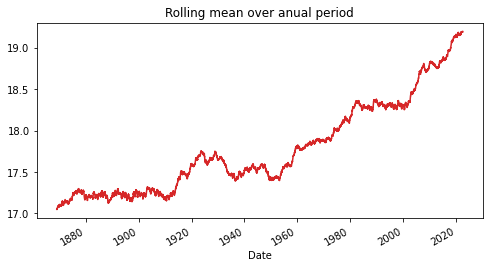

In [28]:
df['T'].rolling(window=365*10).mean().plot(figsize=(8,4),color="tab:red"
                                           ,title="Rolling mean over anual period")

<AxesSubplot:title={'center':'Rolling mean over anual period'}, xlabel='Date'>

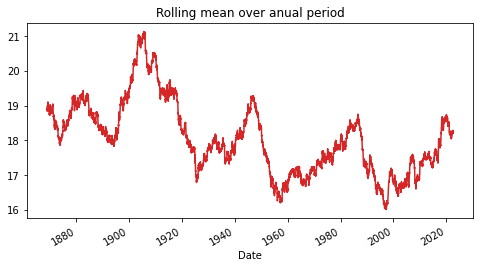

In [29]:
df['T'].rolling(window=365*10).var().plot(figsize=(8,4),color="tab:red"
                                           ,title="Rolling mean over anual period")

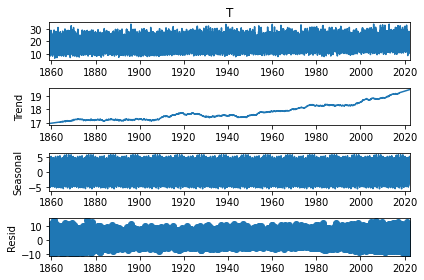

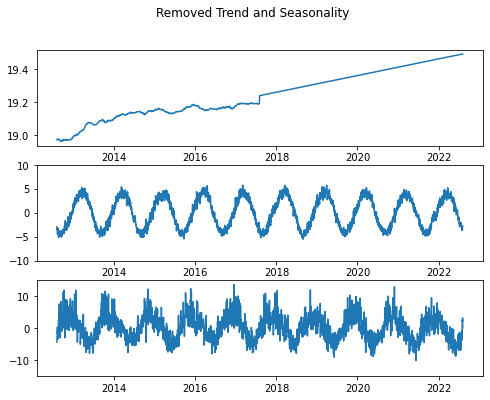

In [30]:
decompose_result = seasonal_decompose(df['T'], model='additive', period=int(365*10), extrapolate_trend='freq')

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

### Visualise All Data
decompose_result.plot()
plt.show()

### Visualise 10 years
years_examine = 365*10
fig, axs = plt.subplots(3, figsize=(8,6))
fig.suptitle('Removed Trend and Seasonality')
axs[0].plot(trend[-years_examine:])
axs[1].plot(seasonal[-years_examine:])
axs[1].set_ylim([-10,10])
axs[2].plot(residual[-years_examine:])
axs[2].set_ylim([-15,15])
plt.show()

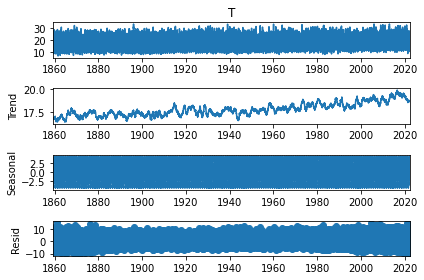

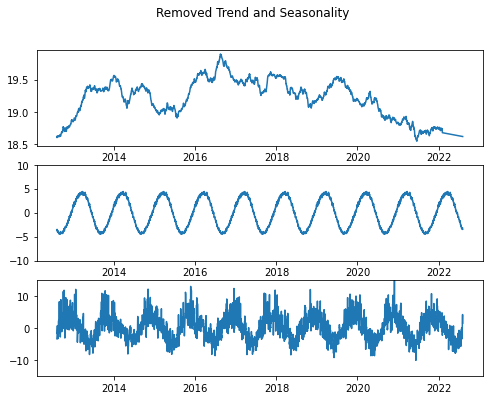

In [31]:
decompose_result = seasonal_decompose(df['T'], model='additive', period=int(365), extrapolate_trend='freq')

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

### Visualise All Data
decompose_result.plot()
plt.show()

### Visualise 10 years
years_examine = 365*10
fig, axs = plt.subplots(3, figsize=(8,6))
fig.suptitle('Removed Trend and Seasonality')
axs[0].plot(trend[-years_examine:])
axs[1].plot(seasonal[-years_examine:])
axs[1].set_ylim([-10,10])
axs[2].plot(residual[-years_examine:])
axs[2].set_ylim([-15,15])
plt.show()

### Check for residuals distribution

In [32]:
dftest = adfuller(residual, autolag='AIC')

print(f'1. ADF: {dftest[0]}')
print(f'2. P-value: {dftest[1]}')
print(f'3. Num of lags: {dftest[2]}')
print(f'4. Num of observations Used for ADF Regression and Critical Values Calculation: {dftest[3]}')
for key, val in dftest[4].items():
    print("\t",key,': ',val)

1. ADF: -20.80621370672075
2. P-value: 0.0
3. Num of lags: 60
4. Num of observations Used for ADF Regression and Critical Values Calculation: 59527
	 1% :  -3.430459859089356
	 5% :  -2.861588555632548
	 10% :  -2.566795844527503


<AxesSubplot:>

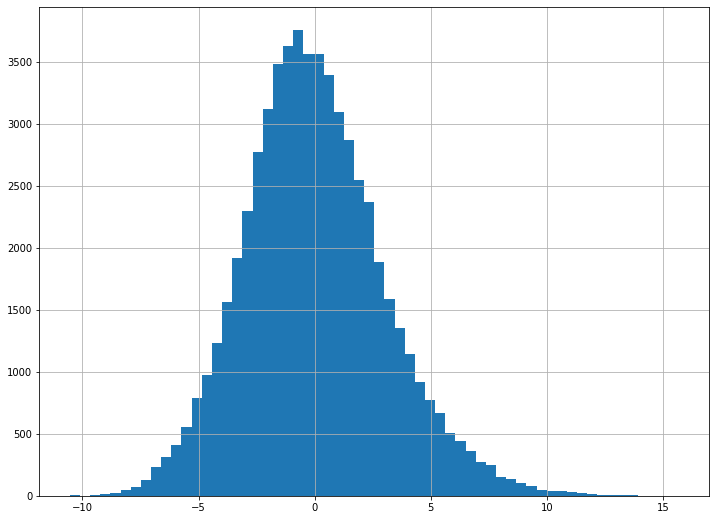

In [33]:
residual.hist(bins=60, figsize=(12,9))

### Analysis of Autocorrelation

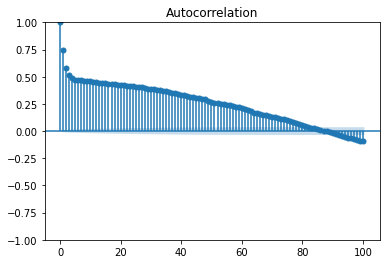

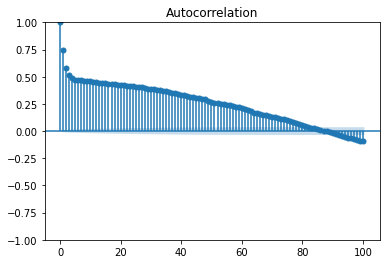

In [34]:
plot_acf(residual, lags=100)

Since the auto correlation function don't seems to vanish with the increase of number of lags, we do not try and fit a moving avarage model

### Determine AR order by use of PACF & AIC Criterion

PACF instead of finding correlation of present values with lags like ACF, it finds correlation of the residuals.

/home/bruno/Quant_Finance/Temperature_Derivatives/temdev/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


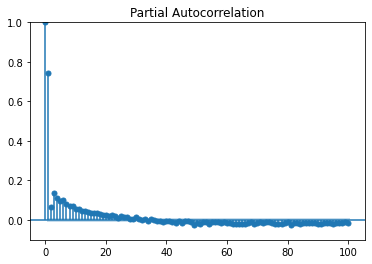

In [35]:
plot_pacf(residual, lags=100)
plt.figsize=(18,15)
plt.ylim([-0.1, 1])
plt.show()

### Akaike Information Criterion (AIC)

Is a score for goodness of fit of a model for a certain dataset:

$$ AIC = -2\ln(L) + 2k$$

AIC equation, where L = likelihood and k = # of parameters. AIC uses a model's maximum likelihood estimation (log-likelihood) as a measure of how likely one is to see their observed data, given a model. The model with the maximum likelihood is the one that "fits" the data the best.

The desired result is to find the lowest possible AIC, which indicates the best balance of model fit with generalizability. This serves the eventual goal of maximizing fit on out-of sample data.

In [36]:
residuals = residual.copy(deep=True)
residuals.index = pd.DatetimeIndex(residuals.index).to_period('D')

/home/bruno/Quant_Finance/Temperature_Derivatives/temdev/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:233: FutureWarning: old_names will be removed after the 0.14 release. You should stop setting this parameter and use the new names.
  warnings.warn(
/home/bruno/Quant_Finance/Temperature_Derivatives/temdev/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:233: FutureWarning: old_names will be removed after the 0.14 release. You should stop setting this parameter and use the new names.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

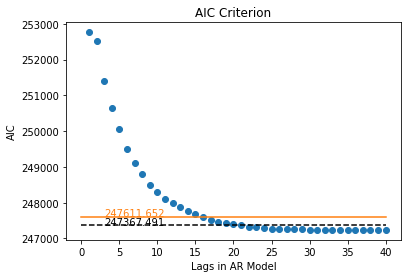

In [37]:
mod = ar_select_order(residuals, maxlag=40, ic='aic', old_names=True)

aic = []
for key, val in mod.aic.items():
    if key != 0:
        aic.append((key[-1],val))

aic.sort()
x,y = [x for x,y in aic],[y for x,y in aic]
plt.scatter(x, y)
plt.plot([0,40],[y[15],y[15]], 'tab:orange')
plt.text(3,y[15]+0.002, '{0}'.format(round(y[15],3)),color='tab:orange')
plt.plot([0,40],[y[20],y[20]], 'k--')
plt.text(3,y[20]-0.004, '{0}'.format(round(y[20],3)))
plt.title("AIC Criterion")
plt.xlabel("Lags in AR Model")
plt.ylabel("AIC")
plt.show

### Fitting a AR with lags=15

In [40]:
model = AutoReg(residuals, lags=15, old_names=True, trend='n')
model_fit = model.fit()
coef = model_fit.params
res = model_fit.resid
res.index = res.index.to_timestamp()
print(model_fit.summary())

/home/bruno/Quant_Finance/Temperature_Derivatives/temdev/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:233: FutureWarning: old_names will be removed after the 0.14 release. You should stop setting this parameter and use the new names.
  warnings.warn(


                            AutoReg Model Results                             
Dep. Variable:                  resid   No. Observations:                59588
Model:                    AutoReg(15)   Log Likelihood             -123877.163
Method:               Conditional MLE   S.D. of innovations              1.936
Date:                Sun, 07 Aug 2022   AIC                         247786.326
Time:                        16:13:12   BIC                         247930.245
Sample:                    01-16-1859   HQIC                        247831.044
                         - 08-06-2022                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
resid.L1       0.6140      0.004    149.979      0.000       0.606       0.622
resid.L2      -0.0508      0.005    -10.567      0.000      -0.060      -0.041
resid.L3       0.0356      0.005      7.393      0.0

## Detrending and deseasonalizing data with fourier series



### Denoise DAT series using convolutions:

$$(f*g)(x) = \int_{-\infty}^{\infty} f(\tau)g(x-\tau)d\tau$$

In [49]:
temps = df[['T']]
temps

,T
Date,
1859-01-01,19.45
1859-01-02,20.05
1859-01-03,19.75
1859-01-04,21.05
1859-01-05,20.75
...,...
2022-08-02,14.55
2022-08-03,18.30
2022-08-04,18.35


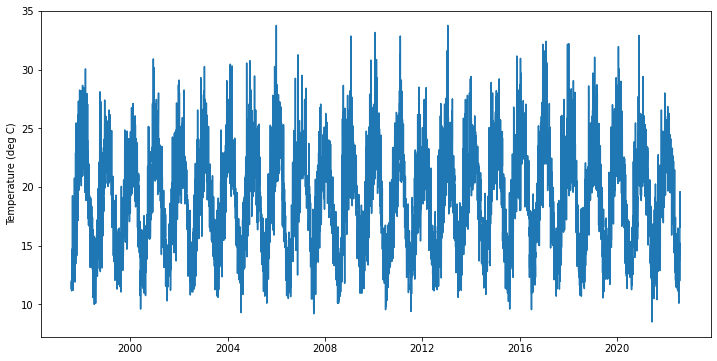

In [50]:
from scipy import signal

lookback = 365*25
fig = plt.figure(figsize=(12,6))
plt.plot(temps['T'][-lookback:])
plt.ylabel('Temperature (deg C)')
plt.show()

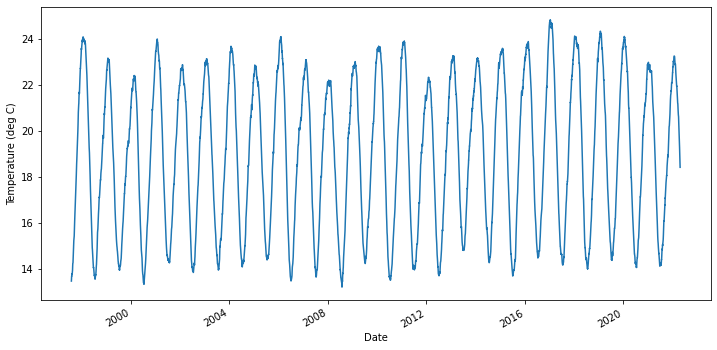

In [51]:
def apply_convolution(x, window):
    conv = np.repeat([0., 1., 0.], window)
    filtered = signal.convolve(x, conv, mode='same') / window
    return filtered

denoised = temps.apply(lambda x: apply_convolution(x, 90))
denoised['T'][-lookback:-100].plot(figsize=(12,6))
plt.ylabel('Temperature (deg C)')
plt.show()

### Longterm Trends

By observing the rolling moving average over time, we noticed that there is a clear but weak trend over time.
Therefore we will simply use the following linear function.

$$ T_{linear} = a + bt$$

<AxesSubplot:title={'center':'Rolling mean over annual periods'}, xlabel='Date', ylabel='Temperature degC'>

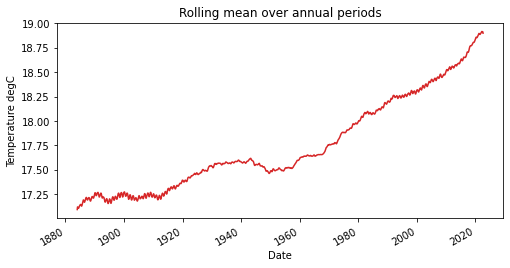

In [55]:
denoised['MA'] = denoised['T'].rolling(window = lookback).mean()
plt.ylabel('Temperature degC')
denoised['MA'].plot(figsize=(8,4), color="tab:red", title="Rolling mean over annual periods")

### Seasonal Variation

After detrending the series, we can use fourier series to model the seasonal variation:

$T_{seasonal} = a_{0} + \sum_{i} \alpha_{i} sin(iw_{1}t + \theta) + \sum_{i} \beta_{i} cos(iw_{2}t + \phi)$ [1]

Although, many papers suggest that temperature seasonal variation can be captured by just using the first order Fourier Series:

$T_{seasonal} = a_{0} +\alpha sin(wt + \theta) + \beta cos(wt + \phi)$ [2]

Some even suggest using just the single sine component:

$T_{seasonal} = \alpha sin(wt + \theta)$ [3]

In the case of [3] we can apply this:

$T_{seasonal} = \alpha sin(wt + \theta) = \alpha sin(\theta)cos(wt) + \alpha cos(\theta)sin(wt)$

Defining $$a_{1} = \alpha sin(\theta)$$ and $$b_{1} = \alpha cos(\theta)$$

$$T_{seasonal} = a_{1}cos(wt) + b_{1}sin(wt)$$

where:
- $a = \sqrt{a_{1}^2+b_{1}^2}$
- and because $\tan(\theta) = a_{1}/b_{1}$ -> $\theta = \tan^{-1}(a_{1}/b_{1})$

### De-trended & seasonlity removed

$$T_{t} = T_{trend} + T_{seasonal}$$

And we can compare two models:

1. $T_{t} = a+bt+\alpha sin(wt+\theta) + \beta cos(wt+\phi)$
2. $T_{t} = a+bt+\alpha sin(wt+\theta)$

**Asumption:**
- the speeds of the seasonal processes are the same at $\omega = 2 \pi / 365$

### Model Fitting: Non Linear Least Squeares:

Here we use the *scipy.optimize.curve_fit* which implements the *Levenberg-Marquardt algorithm (LMA)*.

This is used in non-linear least squares problmes and combines both the *Gauss-Newton algorithm (GNA)* and *grandient descend* methods.

$$\hat{\beta} \in argmin_{\beta}S(\beta) \equiv argmin_{\beta}S \sum_{i-1}^{N} [y_{i}-f(x_{i},\beta)]^2 $$


 Model 1 

a :  16.8  CI ~normally [1.68e+01,1.68e+01]
b :  3.35e-05  CI ~normally [3.24e-05,3.47e-05]
a1 :  3.92  CI ~normally [3.89e+00,3.95e+00]
b1 :  3.0  CI ~normally [2.97e+00,3.02e+00]

 Model 1 

a :  16.8  CI ~normally [1.68e+01,1.68e+01]
b :  3.35e-05  CI ~normally [3.24e-05,3.47e-05]
a1 :  -1.55e+02  CI ~normally [nan,nan]
b1 :  1.5e+02  CI ~normally [nan,nan]
theta :  1.03e+02  CI ~normally [-7.09e+03,7.30e+03]
phi :  2.17e+02  CI ~normally [nan,nan]


/tmp/ipykernel_8975/3827676001.py:42: RuntimeWarning: invalid value encountered in sqrt
  std_dev = np.sqrt(np.diag(cov1))


Residual Sum of Squares (RSS)
  RSS model generalised: 112352.86
  RSS model sine curve : 112352.89


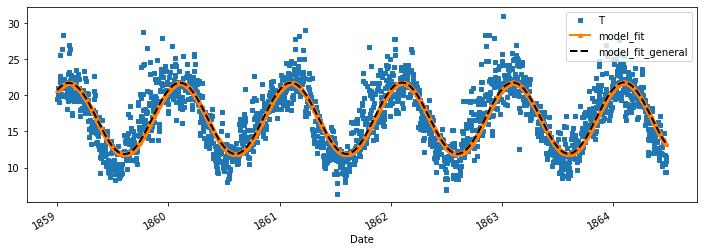

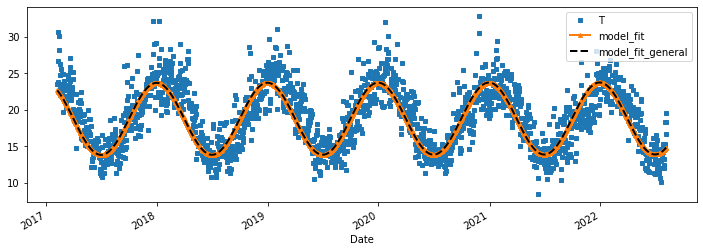

In [58]:
from scipy.stats import norm
from scipy.optimize import curve_fit

temp_t = temps['T'].copy(deep=True)
temp_t = temp_t.to_frame()

def model_fit_general(x, a, b, a1, b1, theta, phi):
    omega = 2*np.pi/365 #365.25
    y_pred = a + b*x + a1*np.cos(omega*x + theta) + b1*np.sin(omega*x + phi)
    return y_pred

def model_fit(x, a, b, a1, b1):
    omega = 2*np.pi/365 #365.25
    y_pred = a + b*x + a1*np.cos(omega*x) + b1*np.sin(omega*x)
    return y_pred

def RSS(y, y_pred):
    return np.sqrt( (y - y_pred)**2 ).sum()

if isinstance(temp_t.index , pd.DatetimeIndex):
    first_ord = temp_t.index.map(datetime.toordinal)[0]
    temp_t.index=temp_t.index.map(datetime.toordinal)
    
params, cov = curve_fit(model_fit, xdata = temp_t.index-first_ord, ydata = temp_t['T'], method='lm')

param_list = ['a', 'b', 'a1', 'b1']

print('\n Model 1 \n') 
std_dev = np.sqrt(np.diag(cov))
for name, p, sd in zip( param_list, params, std_dev):
    print('{0} :  {1:0.3}  CI ~normally [{2:0.2e},{3:0.2e}]'.format(name, p, p-1.96*sd,p+1.96*sd))
    
temp_t['model_fit'] = model_fit(temp_t.index-first_ord, *params)

if isinstance(temp_t.index , pd.DatetimeIndex):
    temp_t.index=temp_t.index.map(datetime.toordinal)
params1, cov1 = curve_fit(model_fit_general, xdata = temp_t.index-first_ord, ydata = temp_t['T'], method='lm')

param_list = ['a', 'b', 'a1', 'b1', 'theta', 'phi']

print('\n Model 1 \n') 
std_dev = np.sqrt(np.diag(cov1))
for name, p, sd in zip( param_list, params1, std_dev):
    print('{0} :  {1:0.3}  CI ~normally [{2:0.2e},{3:0.2e}]'.format(name, p, p-1.96*sd,p+1.96*sd))

temp_t['model_fit_general'] = model_fit_general(temp_t.index-first_ord, *params1)

if not isinstance(temp_t.index , pd.DatetimeIndex):
    temp_t.index=temp_t.index.map(datetime.fromordinal)

temp_t[:2000].plot(figsize=(12,4), style=['s','^-','k--'] , markersize=4, linewidth=2 )
temp_t[-2000:].plot(figsize=(12,4), style=['s','^-','k--'] , markersize=4, linewidth=2 )

RSS(temp_t['T'], temp_t['model_fit_general'])
print('Residual Sum of Squares (RSS)')
print('  RSS model generalised:', round(RSS(temp_t['T'], temp_t['model_fit_general']),2))
print('  RSS model sine curve :', round(RSS(temp_t['T'], temp_t['model_fit']),2))

Because of the assumption of $\omega = 2 \pi / 365$ and leap years adding up, we might experience **Leading Phase Difference** and **Lagging Phase Difference**

Parameters:
     a 16.8
     b 3.32e-05
 alpha 5.05
 theta 1.27


<AxesSubplot:xlabel='Date'>

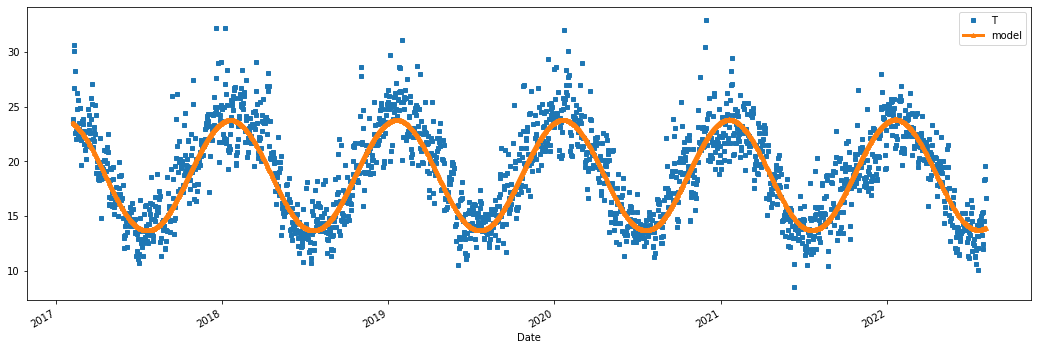

In [62]:
temp_t = temps['T'].copy(deep=True)
temp_t = temp_t.to_frame()

def model(x, params):
    a,b,a1,b1 = params
    omega = 2*np.pi/365.25 #365.25
    theta = np.arctan(a1/b1)
    alpha = np.sqrt( a1**2 + b1**2)   
    print('Parameters:\n     a {0:0.3}\n     b {1:0.3}\n alpha {2:0.3}\n theta {3:0.3}'.format(a,b,alpha,theta))
    y_pred = a + b*x + alpha*np.sin(omega*x + theta)
    return y_pred

def model_fit(x, a, b, a1, b1):
    omega = 2*np.pi/365.25
    y_pred = a + b*x + a1*np.cos(omega*x) + b1*np.sin(omega*x)
    return y_pred

if isinstance(temp_t.index , pd.DatetimeIndex):
    first_ord = temp_t.index.map(datetime.toordinal)[0]
    temp_t.index=temp_t.index.map(datetime.toordinal)
    
params_all, cov = curve_fit(model_fit, xdata = temp_t.index-first_ord, ydata = temp_t['T'], method='lm')
    
temp_t['model'] = model(temp_t.index-first_ord, params_all)

if not isinstance(temp_t.index , pd.DatetimeIndex):
    temp_t.index=temp_t.index.map(datetime.fromordinal)
    
temp_t[-2000:].plot(figsize=(18,6), style=['s','^-','k-'] , markersize=4, linewidth=3 )

### Our model for the trend and seasonality

This is our changing average of DAT:

$$\tilde{T_{t}} = a + bt + \alpha sin(wt + \theta)$$

Where our changing average of DAT $\tilde{T_{t}}$ is:
 
$$\tilde{T_{t}} = 16.8 + (3.32e-05)t +5.05 sin(((2\pi)/365*25)t + 1.27)$$

### Explore the Residuals

In [60]:
temp_t

,T,model_fit,model_fit_general
Date,,,
1859-01-01,19.45,20.714930,20.714953
1859-01-02,20.05,20.765960,20.765983
1859-01-03,19.75,20.815813,20.815836
1859-01-04,21.05,20.864473,20.864496
1859-01-05,20.75,20.911927,20.911950
...,...,...,...
2022-08-02,14.55,14.616842,14.616813
2022-08-03,18.30,14.662717,14.662689
2022-08-04,18.35,14.709817,14.709789


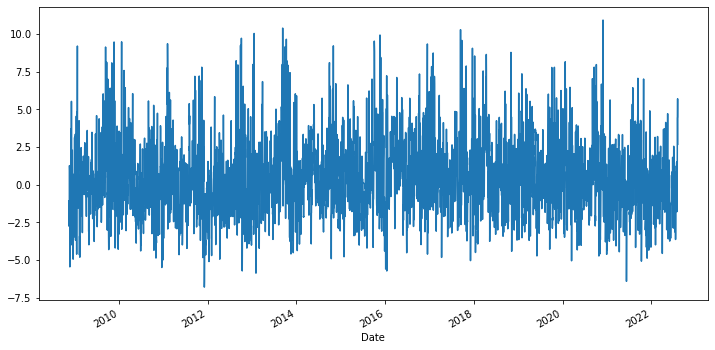

/home/bruno/Quant_Finance/Temperature_Derivatives/temdev/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


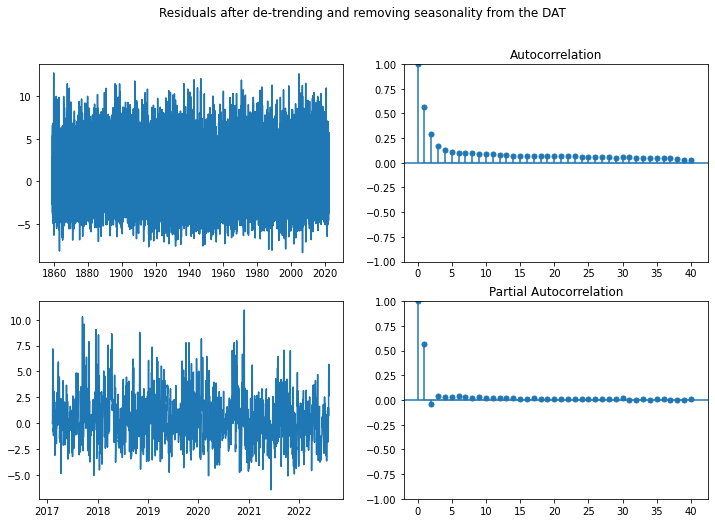

In [63]:
if not isinstance(temp_t.index , pd.DatetimeIndex):
    temp_t.index=temp_t.index.map(datetime.fromordinal)

temp_t['res'] = temp_t['T']-temp_t['model']
temp_t['res'][-5000:].plot(figsize=(12,6))
plt.show()

fig, axs = plt.subplots(2,2, figsize=(12,8))
fig.suptitle('Residuals after de-trending and removing seasonality from the DAT')
axs[0,0].plot(temp_t['res'])
axs[1,0].plot(temp_t['res'][-2000:])
plot_acf(temp_t['res'], lags=40, ax=axs[0,1])
plot_pacf(temp_t['res'], lags=40, ax=axs[1,1])
plt.show()

**Partial Autocorrelation function show strong correlation at 1 lag, this indicate that we might need to account for an autoregressive component.**

### QQ-Plot

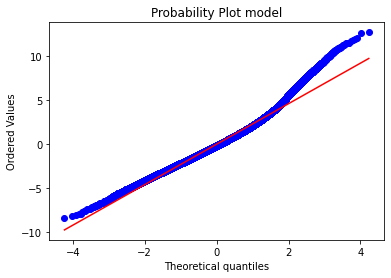

P(Z > 2): 3.58% vs Normal Distibution: 2.28% 
SKEW    : 0.626
KURTOSIS: 4.23


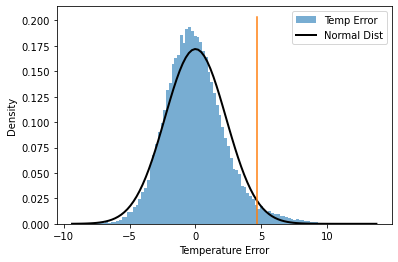

In [64]:
import scipy.stats as stats
stats.probplot(temp_t['res'], dist="norm", plot=plt)
plt.title("Probability Plot model")
plt.show()

mu, std = norm.fit(temp_t['res'])
z = (temp_t['res'] - mu)/std
plt.hist(temp_t['res'], density=True, alpha=0.6, bins=100, label='Temp Error')

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
data = np.random.randn(100000)

plt.plot(x, p, 'k', linewidth=2, label='Normal Dist')
plt.plot([std*2,std*2],[0,ymax])

print('P(Z > 2): {:0.3}% vs Normal Distibution: {:0.3}% '.format(len(z[z >= 2])/len(z)*100, (1-norm.cdf(2))*100))
print('SKEW    : {:0.3}'.format(stats.skew(z)))
print('KURTOSIS: {:0.3}'.format(stats.kurtosis(z)+3))
plt.ylabel('Density')
plt.xlabel('Temperature Error')
plt.legend()
plt.show()

**Second error of model is not normally distribuited. Could be the case of volatiliy and/or seasonality**

## Modifying the Ornstein-Uhlenbeck process

The cyclical nature of the temperature time series justifies the use of a mean-reverting process in modelling its dynamics. We can model this as Ito process with a mean reverting **Ornstein-Uhlenbeck** process

### Why not a normla mean-reverting Ornstein-Uhlenbeck?

$$dT_{t} = k(\tilde{T_{t}}-T_{t})dt + \sigma_{t}dW_{t}$$

To capture fully the mean-reverting dynamics of the temperature, it is important that we have:

$$E[T_{T}] \approx \tilde{T_{t}}$$

### Using Ito-Doeblin formula

Ito-Doeblin (where x is an ito process):
$$df(t,x) = f_{t}(t,x)dt + f_{x}(t,x)dx + 0.5 f_{xx}(t,x)dxdx$$

The hard path is choosing the function to use, the function we choose is the exponential:

$f(t,x) = e^{Kt}x$, where $f_{t}(t,x) = Ke^{Kt}x$, $f_{x}(t,x) = e^{Kt}$ and $f_{xx}(t,x) = 0$

### Solving our SDE:

We apply Ito-Doeblin to our SDE where our Ito process is T(t) with dynamics dT(t) as described by our mean-reverting SDE:

$$d(e^{Kt}T_{t}) = df(t,T_{t}) = f_{t}(t,T_{t})dt + f_{T_{t}}(t,T_{t})dT_{t} + 0.5 f_{T_{t} T_{t}}(t,T_{t})dT_{t}dT_{t}$$

Replacing values:

$$d(e^{Kt}T_{t}) = Ke^{Kt}T_{t}dt+ e^{Kt}dT_{t}$$

Then we sustitue the dynamics dT_{t}:

$$d(e^{Kt}T_{t}) = Ke^{Kt}T_{t}dt+ e^{Kt}K(\tilde{T_{t}}-T_{t})dt + e^{Kt}\sigma_{t}dW_{t}$$

Then we can cancel terms:

$$d(e^{Kt}T_{t}) = e^{Kt}K\tilde{T_{t}}dt + e^{Kt}\sigma_{t}dW_{t}$$

Integrating:

$$\int_{s}^{t} d(e^{Kt}T_{t}) = e^{Kt}T_{t} - e^{Ks}T_{s} = \int_{s}^{t} e^{Ku}K\tilde{T_{u}}du + \int_{s}^{t}e^{Ku}\sigma_{t}dW_{u}$$

(change base on Riemann integral to $d\tilde{T_{t}}$, then divide by $e^{Kt}$):

$$T_{t} = T_{s}e^{-K(t-s)} + \int_{s}^{t} e^{-K(t-u)} d\tilde{T_{u}} + \int_{s}^{t} e^{-K(t-s)} \sigma dW_{u}$$


$$T_{t} = \tilde{T_{t}} + (T_{s}-\tilde{T_{s}})e^{-K(t-s)} + \int_{s}^{t} e^{-K(t-s)} \sigma dW_{u}$$

### The isuue: Expectation is not Longrun Average Temperature:

This happens because the mean process that the equation is reverting to, $\tilde{T}$, is not constant over time

### Solving our issue:

$$ dT_{t} = [d\tilde{T_{t}}/dt + K(\tilde{T_{t}}-T_{t})]dt + \sigma_{t}dW_{t}$$

## Modified OU Dynamics

$$ dT_{t} = [d\tilde{T_{t}}/dt + K(\tilde{T_{t}}-T_{t})]dt + \sigma_{t}dW_{t}$$

Where our changing average of DAT $\tilde{T_{t}}$ is:
 
$$\tilde{T_{t}} = 16.8 + (3.32e-05)t +5.05 sin(((2\pi)/365*25)t + 1.27)$$

Then we need to estimate K, speed of Mean Reversion:

### Estimating Spped of Mean Reversion:

Using Euler Discretization of our SDE over the interval between $t \in [i-1, i].$

$$T_{i} - T_{i-1} = \tilde{T_{i}} - \tilde{T_{i-1}} + K(\tilde{T_{i-1}}-T_{i-1}) + \sigma_{i}z_{i}$$ 

Where z_{t} is Normal Standard. 

$$T_{i} - T_{i-1} = \tilde{T_{i}} - \tilde{T_{i-1}} - K(T_{i-1}-\tilde{T_{i-1}}) + \sigma_{i}z_{i}$$ 

and
 
$\hat{T_{t}} = T_{t} - \tilde{T_{t}}$

$$\hat{T_{t}} = \hat{T_{i-1}} - K(\hat{T_{i-1}}) + \sigma_{i}z_{i}$$

And this can be modelled as an AR(1) process:

$$\hat{T_{i}} = \gamma\hat{T_{i-1}} + e_{i}$$

Where $\gamma = 1 - K$

In [66]:
residuals = temp_t['res']
residuals.index = pd.DatetimeIndex(residuals.index).to_period('D')

model = AutoReg(residuals, lags=1, old_names=True,trend='n')
model_fit  = model.fit()
coef = model_fit.params
res = model_fit.resid
# res.index = res.index.to_timestamp()
print(model_fit.summary())

/home/bruno/Quant_Finance/Temperature_Derivatives/temdev/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:233: FutureWarning: old_names will be removed after the 0.14 release. You should stop setting this parameter and use the new names.
  warnings.warn(


                            AutoReg Model Results                             
Dep. Variable:                    res   No. Observations:                59588
Model:                     AutoReg(1)   Log Likelihood             -123417.783
Method:               Conditional MLE   S.D. of innovations              1.920
Date:                Sun, 07 Aug 2022   AIC                         246839.566
Time:                        19:37:06   BIC                         246857.556
Sample:                    01-02-1859   HQIC                        246845.156
                         - 08-06-2022                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
res.L1         0.5621      0.003    165.886      0.000       0.555       0.569
                                    Roots                                    
                  Real          Imaginary           M

**As you can see we have most of the components, we just need to estimate volatility $\sigma$**